# Case 6 (CRISA) Bath Soap Solution Narrative
We look first at clusters based on purchase behavior, then clusters based on the basis for purchase, then
clusters based on both. The complexity of marketing to 5 segments would probably not be supported
by clustering just based on purchase behavior, or clustering just based on basis for purchase, so we will
look at 2-3 clusters for those variables, and more when we cluster using both sets of variables.

In choosing $k$, we would seek a $k$ that produces clusters that are distinct and separate from one another,
in ways (variables) that are translatable into marketing actions. The variables we have been asked to
consider are those that relate to purchase behavior (volume and frequency of purchase, brand loyalty),
and a separate set that relate to the basis for purchase (response to promotions, pricing, and selling
proposition).

Finally, we look at predictive models that classify customers into segments based on demographic data

In [1]:
from Bath_Soap import kMeansClustering
from Bath_Soap import clusterCenters, clusterSizes, clusterDemographics
from Bath_Soap import behaviorIndicator, purchaseBasisIndicator
from Bath_Soap import display_side_by_side, prepareTrainTest
from Bath_Soap import evaluateClassifier, logisticRegresssion, plotLiftCurve

import statsmodels.api as sm

## Clusters based on "purchase behavior"
Note: Some thought is needed about brand loyalty. For brand loyalty indicators, we have data on 
    
1. percent of purchases devoted to major brands (i.e. is a customer a total devotee of brand A?), 
2. a catch-all variable for percent of purchases devoted to other smaller brands (to reduce complexity of analysis), and 
3. a derived variable that indicates the maximum share devoted to any one brand. 
    
Since
CRISA is compiling this data for general marketing use, and not on behalf of one particular brand, we can
say a customer who is fully devoted to brand A is similar to a customer fully devoted to brand B - both
are fully loyal customers in their behavior. But if we include all the brand shares in the clustering, the
analysis will treat those two customers as very different. So we will use only the derived variable for
maximum purchase share for a brand, any brand, plus "max.brand.ind" and the "other.brand.ind," along
with the purchase.ind (for volume, frequency, etc.). We will not use the individual values - "brand.ind."

In [2]:
# Cluster dataset using 'behaviorIndicator' into two clusters
clusters = kMeansClustering(2, behaviorIndicator)
print(clusterSizes(clusters))
clusterCenters(clusters, behaviorIndicator)

0    317
1    283
dtype: int64


,No. of Brands,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran,Avg. Price,Others 999,maxBrandIndicator
0,0.483611,0.632865,0.158222,0.522115,0.306960,-0.261283,-0.285383,0.279689,0.488928,-0.588026
1,-0.541712,-0.708898,-0.177232,-0.584843,-0.343838,0.292674,0.319669,-0.313291,-0.547669,0.658673


Comment: The two clusters are well-separated on everything, except transaction volume. 
- Cluster 0 (n=317) is high activity & value, with low loyalty. 
- Cluster 1 (n=283) is the reverse. 

("Value" here is the meaning attached to the variable - total dollar value of purchases, not some broader meaning.)
Note: Due to the randomization element in the k-means process, different runs can produce different
cluster results.

In [3]:
# Cluster dataset using 'behaviorIndicator' into three clusters
clusters = kMeansClustering(3, behaviorIndicator)
print(clusterSizes(clusters))
clusterCenters(clusters, behaviorIndicator)

0    169
1    255
2    176
dtype: int64


,No. of Brands,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran,Avg. Price,Others 999,maxBrandIndicator
0,0.956671,1.089336,0.614067,1.070582,0.744401,-0.255378,-0.202562,0.126356,0.253722,-0.476069
1,-0.301247,-0.224690,-0.531892,-0.425770,-0.453789,-0.246577,-0.266204,0.232878,0.611302,-0.536321
2,-0.482156,-0.720465,0.180994,-0.411120,-0.057315,0.602477,0.580199,-0.458739,-1.129323,1.234190


Comment: 
- Cluster 0 (n=169) is not at all loyal, favoring many brands, and of high value.
- Cluster 1 (n=255) is also not very loyal, but may be of the least interest since its customers have the lowest value.
- Cluster 2 (n=176) is highly loyal, favoring main brands and bigger individual purchases, with middling overall value. 


## Clusters based on all of the above variables


In [4]:
# Cluster dataset using 'behaviorIndicator' and 'purchaseIndicator' into two clusters
combinedIndicator = behaviorIndicator + purchaseBasisIndicator
clusters = kMeansClustering(2, combinedIndicator)
print(clusterSizes(clusters))

# Display cluster centers and cluster demographics
display_side_by_side(clusterCenters(clusters, combinedIndicator).transpose(),
                     clusterDemographics(clusters).transpose())

0    527
1     73
dtype: int64


,0,1
No. of Brands,0.071443,-0.515759
Brand Runs,0.106566,-0.769322
Total Volume,-0.021206,0.153087
No. of Trans,0.054136,-0.390817
Value,0.068413,-0.493883
Trans / Brand Runs,-0.144100,1.040286
Vol/Tran,-0.074972,0.541233
Avg. Price,0.180076,-1.299999
Others 999,0.173881,-1.255280
maxBrandIndicator,-0.194949,1.407373


Comment: The two clusters are separated on almost all variables, Value being an important exception.
- Cluster 1 (n=73) is the more loyal, with lower socioeconomic status and affluence, and larger
households.

In [5]:
# Cluster dataset using 'behaviorIndicator' and 'purchaseIndicator' into two clusters
combinedIndicator = behaviorIndicator + purchaseBasisIndicator
clusters = kMeansClustering(3, combinedIndicator)
print(', '.join('Cluster {} {}'.format(i, size) for i, size in enumerate(clusterSizes(clusters))))

# Display cluster centers and cluster demographics
cc = clusterCenters(clusters, combinedIndicator).transpose()
display_side_by_side(cc.iloc[:10, :], cc.iloc[10:, :],
                     clusterDemographics(clusters).transpose())

Cluster 0 70, Cluster 1 252, Cluster 2 278


,0,1,2
No. of Brands,-0.583893,0.177248,-0.013647
Brand Runs,-0.800569,0.416647,-0.176098
Total Volume,0.083386,-0.307694,0.257921
No. of Trans,-0.433421,0.230518,-0.099824
Value,-0.555616,-0.002653,0.142308
Trans / Brand Runs,1.037226,-0.251914,-0.032818
Vol/Tran,0.513840,-0.496185,0.320395
Avg. Price,-1.318253,0.712855,-0.314251
Others 999,-1.264136,0.507151,-0.141412
maxBrandIndicator,1.421065,-0.537156,0.129097


Comment:
- Cluster 0: (n=73) Highly loyal, low value, highly responsive to price category 3 and selling proposition 14.
- Cluster 1: (n=252) Low brand loyalty, responsive to price category 1
- Cluster 2: (n=278) Responsive to price category 2 and selling proposition 5, otherwise somewhat middling.


In [6]:
# Cluster dataset using 'behaviorIndicator' and 'purchaseIndicator' into two clusters
clusters = kMeansClustering(4, combinedIndicator)
print(', '.join('Cluster {} {}'.format(i, size) for i, size in enumerate(clusterSizes(clusters))))

# Display cluster centers and cluster demographics
cc = clusterCenters(clusters, combinedIndicator).transpose()
display_side_by_side(cc.iloc[:10, :], cc.iloc[10:, :],
                     clusterDemographics(clusters).transpose())

Cluster 0 108, Cluster 1 70, Cluster 2 202, Cluster 3 220


,0,1,2,3
No. of Brands,-0.414750,-0.583893,0.831690,-0.374254
Brand Runs,-0.323453,-0.800569,0.968608,-0.475846
Total Volume,-0.652097,0.083386,0.296096,0.021719
No. of Trans,-0.428001,-0.433421,0.822379,-0.407077
Value,-0.217635,-0.555616,0.388601,-0.073181
Trans / Brand Runs,-0.137290,1.037226,-0.297963,0.010955
Vol/Tran,-0.457723,0.513840,-0.355763,0.387861
Avg. Price,1.362917,-1.318253,0.057415,-0.302341
Others 999,0.523047,-1.264136,0.371432,-0.195586
maxBrandIndicator,-0.428661,1.421065,-0.554702,0.267594


Comment:
- Cluster 0 (n=108) is characterized by low volume, low loyalty, and sensitivity to promotions and price (responsive to cat. 1, unresponsive to 2 and 3), and unmoved by selling proposition. Demographically, it is affluent, of high socio-economic status, and has relatively small family size.
- Cluster 1 (n=70) stands out in both groups of variables - it has high loyalty, low value and price per purchase, and very differential response to price (unresponsive to categories 1, 2 and 4, highly responsive to category 3), and selling proposition (unresponsive to #5, highly responsive to #14). Demographically it has low affluence and education.
- Cluster 2 (n=202) is distinguished mostly by the purchase behavior variables - it has low brand loyalty together with high value, volume and frequency. The brand switching seems to be intrinsic - this group is not particularly responsive to promotions, pricing or selling propositions. Demographically it is relatively affluent and educated.
- Cluster 3 (n=220) is a "gray" cluster, it is not characterized by very extreme/distinctive values across all variables, but is responsive to price category 2 and selling proposition 5 (similar to cluster 2 in the 3-cluster analysis). Demographically it is relatively affluent and educated. 

## Best cluster approach
There is no single "right" approach to clustering; different approaches are feasible depending on
different marketing purposes. CRISA is a marketing agency and owns the data, which it collected at
considerable expense, so it will want to be able to use both the data and the segmentation analysis in
different ways for different clients. Here are just a few possible marketing approaches:

1. Establishing named customer "personas," corresponding to the cluster segments, for use by a client's sales and marketing teams.
2. Establishing named customer "personas," corresponding to the cluster segments, for use by CRISA in providing marketing services to clients.
3. "Capture affluent market share" campaign for a client who wants to target more affluent consumers who are not wedded to their current brand, and secure more brand share. 
4. "Down market" campaign for a data-poor client to build a "value" brand for less affluent consumers, much as Dollar General has done in the U.S. 

note: The difference between #1 and #2 is that #1, being confined to a single client, can use that client's
customer data to refine and do more analysis. #2 would have to rely on the data collected by CRISA.

## "Down market" scenario
This fourth scenario is the one we will explore further to develop a predictive model, and classify people
into either "value conscious" or not. "Data poor" means that the client has, or can get, demographic
data on their customers, but not detailed purchase data (particularly involving other brands). So a
predictive model is to be built using just demographic data. We will look at the results of clustering into
two segments based on CRISA's own detailed purchase data, then classify people into those two
segments.

Recall our characterization of the two segments:

Comment: The two clusters are separated on almost all variables, Value being an important exception.
Cluster 1 (n=73) is the more loyal, with lower socioeconomic status and affluence, and larger
households.

So our "success" category is cluster 1, the less affluent group, lower socioeconomic group, which also
turns out to be highly loyal and, as it happens, spends roughly as much as the more affluent group. This
is a promising group around which to build a down-market brand strategy.

Multiple models were tried and assessed; see code for details (you will need to re-run the confusion
matrix and plotting section after each model.) Random forest performed best; its lift curve is shown
below. Only demographic predictors are used - CRISA will not have the detailed purchase information
for its client's customers.

#### Results for individual models

In [7]:
train_df, valid_df = prepareTrainTest(n_clusters=2, successCluster=1)

Logistic regression gives an accuracy of 0.87. After ranking, we correctly assign about 65% for 20% of the validation set.

Confusion Matrix (Accuracy 0.8667)

         Prediction
Reference   0   1
        0 203  10
        1  22   5


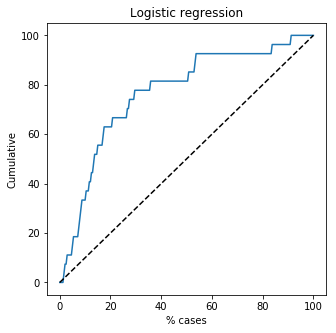

In [8]:
logit = logisticRegresssion(train_df, valid_df)

The decision tree classifier has an accuracy of 0.89 (change the max_depth). After ranking, we correctly assign about 60% for 20% of the validation set. This is less than for logistic regression. Even though the accuracy is higher compared to logistic regression, we would use logistic regression instead of the decision tree. 

Confusion Matrix (Accuracy 0.8958)

         Prediction
Reference   0   1
        0 208   5
        1  20   7


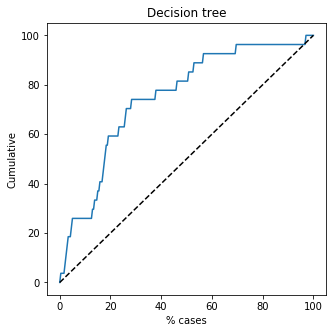

In [9]:
from sklearn.tree import DecisionTreeClassifier
_ = evaluateClassifier(DecisionTreeClassifier(max_depth=5), train_df, valid_df, 'Decision tree')

The k-nearest neighbor classifier has an accuracy of 0.89 (change the max_depth). After ranking, we correctly assign about 55% for 20% of the validation set. Because of this, we would prefer the logistic regression model to the k-nearest neighbor model.

Confusion Matrix (Accuracy 0.8917)

         Prediction
Reference   0   1
        0 205   8
        1  18   9


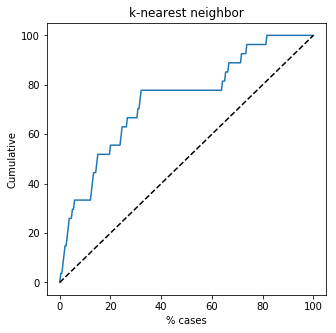

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = evaluateClassifier(KNeighborsClassifier(n_neighbors=5), train_df, valid_df, 'k-nearest neighbor')

The k-nearest neighbor classifier has an accuracy of 0.87. After ranking, we correctly assign about 60% for 20% of the validation set. This is comparable to the logistic regression model.

Confusion Matrix (Accuracy 0.8708)

         Prediction
Reference   0   1
        0 208   5
        1  26   1


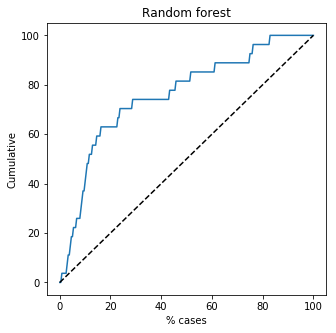

In [11]:
from sklearn.ensemble import RandomForestClassifier
_ = evaluateClassifier(RandomForestClassifier(random_state=0, n_estimators=100), train_df, valid_df, 'Random forest')

The Adaboost classifier gives and accuracy of 0.87 (vary max_depth). In this case, we correctly assign about 70% for 20% of the ranked data.

Confusion Matrix (Accuracy 0.8792)

         Prediction
Reference   0   1
        0 207   6
        1  23   4


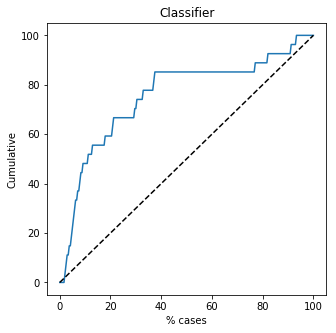

In [12]:
from sklearn.ensemble import AdaBoostClassifier
_ = evaluateClassifier(AdaBoostClassifier(n_estimators=100, base_estimator=DecisionTreeClassifier(max_depth=5)), 
                       train_df, valid_df)

The Adaboost classifier gives and accuracy of 0.89 (vary max_depth). In this case, we correctly assign about 65% for 20% of the ranked data.

Confusion Matrix (Accuracy 0.8875)

         Prediction
Reference   0   1
        0 211   2
        1  25   2


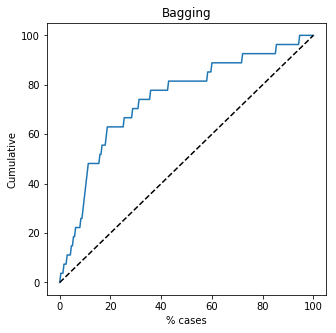

In [13]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(n_estimators=100, base_estimator=DecisionTreeClassifier(max_depth=5), random_state=1)
_ = evaluateClassifier(clf, train_df, valid_df, 'Bagging')

#### Summary
The analysis of the varies models favors the adaboost model. While it doesn't have the highest accuracy, the lift curve shows that it returns more correctly assigned for 20% of the ranked validation set.

## What's next?
Many data mining algorithms are iterative in an mathematical sense - iteration is used to find a good, if
not best, solution. The modeling process itself is also iterative. In initial exploration, we do not seek the
perfect model, merely something to get started. Results are assessed, and we typically continue with a
modified approach.

Several steps can be explored next to improve predictive performance:

1. Some of the demographic categorical variables may not have much value being treated as is, as ordered categorical variables. They could be reviewed and turned into binary dummies.
2. Instead of using a two-cluster model, a multi-cluster model could be used in hopes of deriving more distinguishable clusters. The non-success clusters could then be consolidated. For example, cluster #2 in the 4-cluster model is similar to our cluster 1 ("success") in the 2-cluster model, only more sharply defined.
3. Demographic predictors could be added to the original clustering process.
4. The clustering process, which includes a randomization component that yields variability in resulting clusters, can be repeated, to ensure that the cluster labels reflect some degree of stability. Repetition should show some clustering results that are consistent across various runs. Choosing for your labels a clustering result that is very inconsistent with the others could mean that you are labeling your market segments according to a chance fluke.
5. In the real world, going beyond the parameters of this case study, CRISA would probably work with the client to add the client's own purchase data to the model to improve it over time.